<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#The-Data" data-toc-modified-id="The-Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>The Data</a></span></li><li><span><a href="#Types-of-Cases" data-toc-modified-id="Types-of-Cases-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Types of Cases</a></span></li><li><span><a href="#Assessment-Numbers" data-toc-modified-id="Assessment-Numbers-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Assessment Numbers</a></span></li><li><span><a href="#GIS-Data" data-toc-modified-id="GIS-Data-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>GIS Data</a></span></li></ul></div>

# Introduction

- Types of cases 
- Timing of cases 
- CHV activity 
- Cases by location 
- CHV activity by location

<script>
  function code_toggle() {
    if (code_shown){
      $('div.input').hide('500');
      $('#toggleButton').val('Show Code')
    } else {
      $('div.input').show('500');
      $('#toggleButton').val('Hide Code')
    }
    code_shown = !code_shown
  }

  $( document ).ready(function(){
    code_shown=false;
    $('div.input').hide()
  });
</script>
<form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Show Code"></form>

# The Data


In [1]:
%run "..\..\xUtilz\utilz_only_loader.ipynb"

In [2]:
db = pd.read_csv( r"C:\Users\BILHA\Box Sync\Analytics\Data Dumps\May-31\assessments.csv" )
#db.head().T
#db.dtypes

In [3]:
## Categoriedb.describes
db.describe( ).round( 2 )

db.describe( exclude=[ np.number] ).T


,patient_age_in_years,patient_age_in_months,coughing_duration,diarrhea_duration,fever_duration,patient_temperature,al_pack,lat,lng
count,426836.00,426836.00,170389.00,42736.00,276443.00,386543.00,146345.00,125219.00,125219.00
mean,6.01,76.93,3.68,2.91,2.60,37.21,12.74,0.17,34.49
std,11.55,138.36,7.82,6.25,4.95,1.29,6.69,0.63,0.51
min,-9.00,-110.00,1.00,1.00,1.00,32.00,6.00,-23.84,29.37
25%,1.00,16.00,2.00,1.00,1.00,36.50,6.00,0.09,34.28
50%,3.00,36.00,3.00,2.00,2.00,37.40,12.00,0.38,34.35
75%,4.00,59.00,3.00,3.00,3.00,38.00,18.00,0.63,34.72
max,243.00,2926.00,100.00,100.00,100.00,45.00,24.00,1.04,39.72


,count,unique,top,freq
uuid,426836,426836,CC6A5C99-B38F-22CD-BD2D-6DB98F91C737,1
chw,426836,1647,8fdb1798-823c-4f12-9dd4-0f148c71e274,1546
reported,426836,423546,2018-05-16 16:44:56+00,3
patient_id,426836,168078,4BC426F7-6F7C-9A24-9C65-057DB606440D,33
patient_date_of_birth,426797,18672,2013-11-28,478
patient_coughs,418259,2,no,247870
patient_diarrhea,418258,2,no,375522
patient_fever,418258,2,yes,276443
danger_signs,34522,15,unable_to_feed,11781
diagnosis_cough,170389,6,cough1,128777


In [4]:
d = pd.DataFrame( db.describe( exclude=[ np.number] ) ).T
colz_bin = d[ d["unique"] == 2].index.tolist()

db[ colz_bin  ].head().T

#pd.Series( colz_bin).apply( lambda x: db[x].unique() )

def nmbFactorized( x):
    db[x] = pd.Series( pd.factorize( db[x] , sort=True)[0].astype( int ) ) #.replace( -1, value=np.nan,  inplace=True)
    db[x].loc[ db[x] == -1 ] = np.nan

    
pd.Series( colz_bin).apply( lambda x: nmbFactorized(x) ); 

db[ colz_bin ].head().T



db.describe( ).round( 2 )

db.describe( exclude=[ np.number] ).T

,0,1,2,3,4
patient_coughs,no,no,no,no,no
patient_diarrhea,no,no,no,no,no
patient_fever,yes,yes,yes,yes,yes
diagnosis_diarrhea,NaN,NaN,NaN,NaN,NaN
gave_cough_syrup,NaN,NaN,NaN,NaN,NaN
gave_amox,NaN,NaN,NaN,NaN,NaN
gave_ors,NaN,NaN,NaN,NaN,NaN
gave_zinc,NaN,NaN,NaN,NaN,NaN
gave_al,yes,NaN,NaN,yes,NaN
gave_paracetamol,yes,yes,yes,yes,NaN


0     None
1     None
2     None
3     None
4     None
5     None
6     None
7     None
8     None
9     None
10    None
11    None
12    None
dtype: object

,0,1,2,3,4
patient_coughs,0.0,0.0,0.0,0.0,0.0
patient_diarrhea,0.0,0.0,0.0,0.0,0.0
patient_fever,1.0,1.0,1.0,1.0,1.0
diagnosis_diarrhea,NaN,NaN,NaN,NaN,NaN
gave_cough_syrup,NaN,NaN,NaN,NaN,NaN
gave_amox,NaN,NaN,NaN,NaN,NaN
gave_ors,NaN,NaN,NaN,NaN,NaN
gave_zinc,NaN,NaN,NaN,NaN,NaN
gave_al,1.0,NaN,NaN,1.0,NaN
gave_paracetamol,1.0,1.0,1.0,1.0,NaN


,patient_age_in_years,patient_age_in_months,patient_coughs,patient_diarrhea,patient_fever,diagnosis_diarrhea,coughing_duration,diarrhea_duration,fever_duration,patient_temperature,...,gave_ors,gave_zinc,gave_al,al_pack,gave_paracetamol,treatment_follow_up,referral_follow_up,treat_for_malaria,lat,lng
count,426836.00,426836.00,418259.00,418258.0,418258.00,42736.00,170389.00,42736.00,276443.00,386543.00,...,34745.0,34593.00,160613.00,146345.00,189940.00,426836.00,426836.00,426836.00,125219.00,125219.00
mean,6.01,76.93,0.41,0.1,0.66,0.06,3.68,2.91,2.60,37.21,...,0.8,0.76,0.93,12.74,0.82,0.83,0.16,0.39,0.17,34.49
std,11.55,138.36,0.49,0.3,0.47,0.23,7.82,6.25,4.95,1.29,...,0.4,0.43,0.26,6.69,0.39,0.38,0.36,0.49,0.63,0.51
min,-9.00,-110.00,0.00,0.0,0.00,0.00,1.00,1.00,1.00,32.00,...,0.0,0.00,0.00,6.00,0.00,0.00,0.00,0.00,-23.84,29.37
25%,1.00,16.00,0.00,0.0,0.00,0.00,2.00,1.00,1.00,36.50,...,1.0,1.00,1.00,6.00,1.00,1.00,0.00,0.00,0.09,34.28
50%,3.00,36.00,0.00,0.0,1.00,0.00,3.00,2.00,2.00,37.40,...,1.0,1.00,1.00,12.00,1.00,1.00,0.00,0.00,0.38,34.35
75%,4.00,59.00,1.00,0.0,1.00,0.00,3.00,3.00,3.00,38.00,...,1.0,1.00,1.00,18.00,1.00,1.00,0.00,1.00,0.63,34.72
max,243.00,2926.00,1.00,1.0,1.00,1.00,100.00,100.00,100.00,45.00,...,1.0,1.00,1.00,24.00,1.00,1.00,1.00,1.00,1.04,39.72


,count,unique,top,freq
uuid,426836,426836,CC6A5C99-B38F-22CD-BD2D-6DB98F91C737,1
chw,426836,1647,8fdb1798-823c-4f12-9dd4-0f148c71e274,1546
reported,426836,423546,2018-05-16 16:44:56+00,3
patient_id,426836,168078,4BC426F7-6F7C-9A24-9C65-057DB606440D,33
patient_date_of_birth,426797,18672,2013-11-28,478
danger_signs,34522,15,unable_to_feed,11781
diagnosis_cough,170389,6,cough1,128777
diagnosis_fever,279560,11,malaria2a,121973
mrdt_result,240469,3,positive,167348
branch_uuid,426836,14,fc675f8ba170bc9692b3b706613a2e54,86483


In [5]:
## anon 
db["chw"] = "CHV " +  pd.Series( pd.factorize( db["chw"])[0] + 1).astype( str)
db["patient_id"] = "Patient " +  pd.Series( pd.factorize( db["patient_id"])[0] + 1).astype( str)
db["supervisor_uuid"] = "Supervisor " +  pd.Series( pd.factorize( db["supervisor_uuid"])[0] + 1).astype( str)
db["chw_area_uuid"] = "CHW_Area " +  pd.Series( pd.factorize( db["chw_area_uuid"])[0] + 1).astype( str)
db.drop( "branch_uuid", axis=1, inplace=True)
db.drop( "chw_uuid", axis=1, inplace=True)
db.drop( "uuid", axis=1, inplace=True)

db["Country"] = "KE"

In [6]:
## Format Date Types and order records chronologicall
db["patient_date_of_birth"] = pd.to_datetime( db["patient_date_of_birth"].str[0:19], format="%Y-%m-%d") # inplace=True)
db["reported"] = pd.to_datetime( db["reported"].str[0:19], format="%Y-%m-%d %H:%M:%S") # inplace=True)
db["Year"] = db["reported"].dt.year  
db["Month"] = db["reported"].dt.strftime('%b-%Y') 
db["Day_of_Week"] = db["reported"].dt.weekday_name.str[:3] 

db.sort_values( by='reported', inplace=True)

LAST_UPDATED = db["reported"].max().strftime( '%d-%b-%Y')

print('LAST UPDATED', LAST_UPDATED)

LAST UPDATED 31-May-2018


In [7]:
#colz_nums = pd.Series( db.columns )[ pd.Series( db.columns ).apply( lambda x: np.issubdtype( db[x].dtype , np.number) ) ]
#colz_cats =  db.columns[ db.dtypes == 'object'].tolist()
#colz_bools = db.columns[ db.dtypes == 'bool'].tolist() #pd.Series( db.columns )[ pd.Series( db.columns ).apply( lambda x: not( np.issubdtype( db[x].dtype , np.number) ) ) ]
#db[colz_cats+colz_bools].dtypes 
    
#pd.Series( colz_bin ).apply( lambda x: db[x] = np.where( db[x] ))
#db["patient_coughs"] = np.where( db["patient_coughs"].str.upper() == "NO", 0, np.where( db["patient_coughs"].str.upper() == 'YES', 1, np.nan) )

#db["patient_coughs"] = pd.Series( pd.factorize( db["chw"])[0] + 1).astype( str)
#db[colz_cats+colz_bools].head()
#pd.pivot_table( db, index="Country", values="patient_id", columns=colz_bools, aggfunc='count')


In [8]:
## Dummy variables and turn to numeric
#db["has_cough"] = pd.get_dummies["patient_coughs"]
colz = ["patient_coughs", "patient_diarrhea", "patient_fever", ]

In [9]:
display(HTML('<b>Glimpse of the data</b>'))
db.head(3)

,chw,reported,patient_id,patient_date_of_birth,patient_age_in_years,patient_age_in_months,patient_coughs,patient_diarrhea,patient_fever,danger_signs,...,treat_for_malaria,lat,lng,branch_name,supervisor_uuid,chw_area_uuid,Country,Year,Month,Day_of_Week
299640,CHV 198,2009-01-01 00:23:26,Patient 118183,2005-12-06,3,36,0.0,0.0,1.0,NaN,...,1.0,NaN,NaN,Malava,Supervisor 43,CHW_Area 198,KE,2009,Jan-2009,Thu
259380,CHV 198,2009-01-01 00:25:36,Patient 102488,2004-12-02,4,48,1.0,0.0,0.0,NaN,...,0.0,NaN,NaN,Malava,Supervisor 43,CHW_Area 198,KE,2009,Jan-2009,Thu
146333,CHV 198,2009-01-01 00:27:44,Patient 57848,2011-06-02,-2,-29,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,Malava,Supervisor 43,CHW_Area 198,KE,2009,Jan-2009,Thu


# Types of Cases

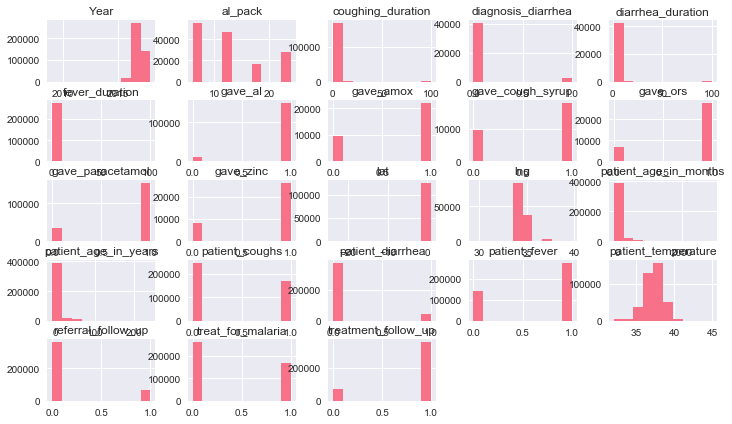

In [16]:
## factors
plotDistz( db ); 


# Assessment Numbers

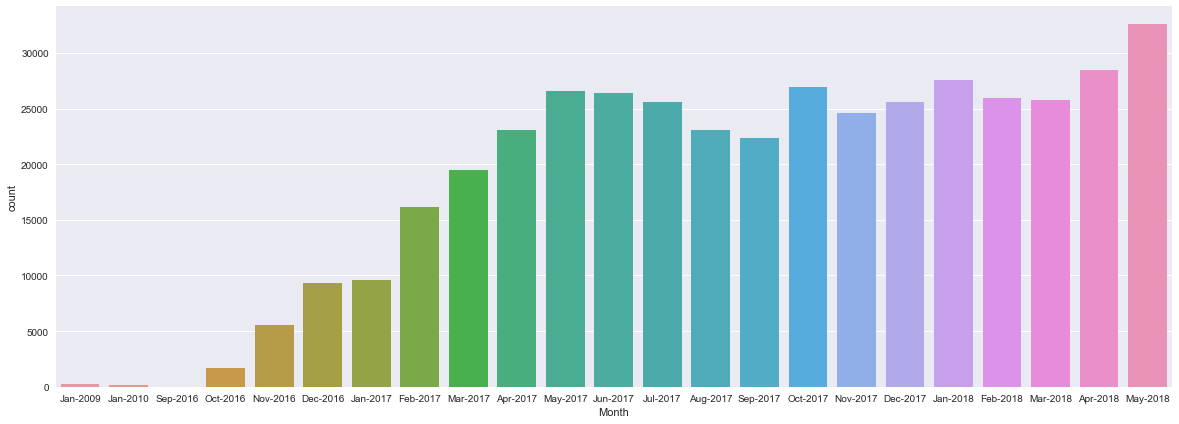

In [11]:
plotObject(20, 7) 
sns.countplot( data=db, x="Month" ); 

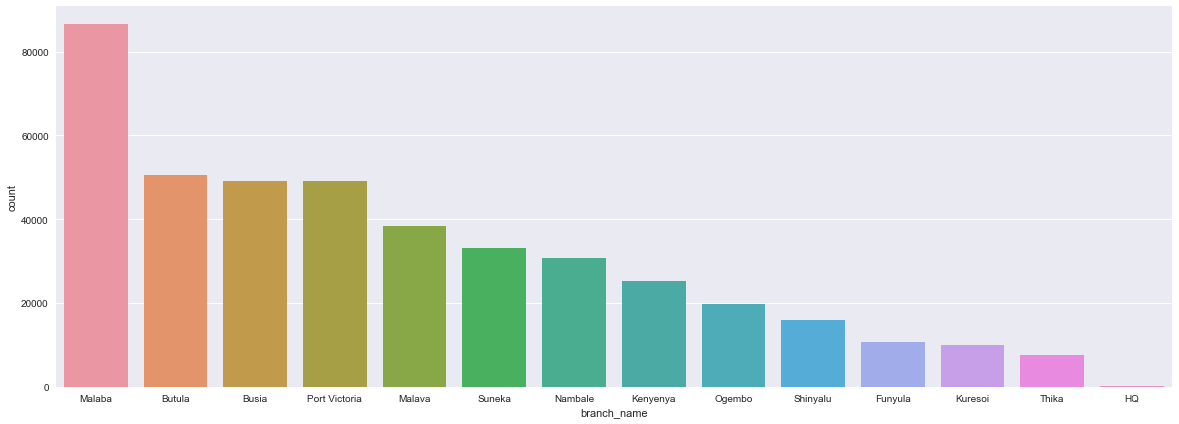

In [12]:
plotObject(20, 7) 
sns.countplot( data=db, x="branch_name", order=db["branch_name"].value_counts().index ); 

# GIS Data

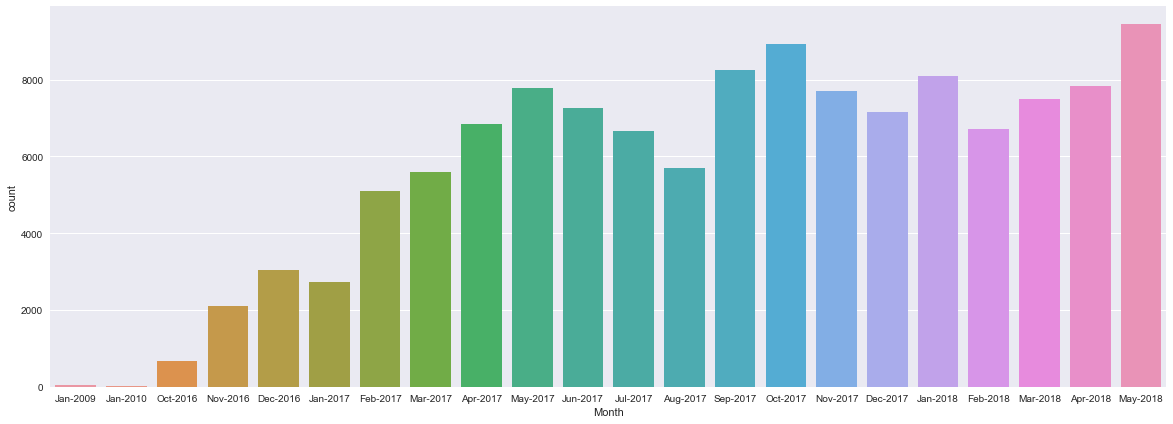

In [13]:
db.shape
gis = db[ pd.isnull(db["lat"]) != True ]
gis.shape
gis.sample(3)

plotObject(20, 7) 
sns.countplot( data=gis, x="Month" ); 

In [14]:
import geopandas as gpd
